In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.loc[df["Chance of Admit "] >= 0.80,"Chance of Admit "]=1
df.loc[df["Chance of Admit "] < 0.80,"Chance of Admit "]=0
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [5]:
Xd=df.iloc[:,0:7]
Yd=df['Chance of Admit ']
print(Xd)
print(Yd)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA
0             1        337          118                  4  4.5   4.5  9.65
1             2        324          107                  4  4.0   4.5  8.87
2             3        316          104                  3  3.0   3.5  8.00
3             4        322          110                  3  3.5   2.5  8.67
4             5        314          103                  2  2.0   3.0  8.21
..          ...        ...          ...                ...  ...   ...   ...
395         396        324          110                  3  3.5   3.5  9.04
396         397        325          107                  3  3.0   3.5  9.11
397         398        330          116                  4  5.0   4.5  9.45
398         399        312          103                  3  3.5   4.0  8.78
399         400        333          117                  4  5.0   4.0  9.66

[400 rows x 7 columns]
0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ...

In [6]:
from sklearn.model_selection import train_test_split
Xd_train,Xd_test = train_test_split(Xd,train_size=0.75,random_state=1)
Yd_train,Yd_test = train_test_split(Yd,train_size=0.75,random_state=1)

In [16]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=0)
model.fit(Xd_train,Yd_train)


DecisionTreeClassifier(random_state=0)

In [17]:
Y_predict=model.predict(Xd_test)
Y_predict

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.])

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [19]:
matrix=confusion_matrix(Yd_test,Y_predict,labels=[0.0,1.0])
matrix

array([[61,  7],
       [ 7, 25]])

In [20]:
accuracy=accuracy_score(Yd_test,Y_predict)
print("Accuracy :- ",accuracy)

Accuracy :-  0.86


In [21]:
print("Classification Repor:- \n",classification_report(Yd_test,Y_predict))

Classification Repor:- 
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        68
         1.0       0.78      0.78      0.78        32

    accuracy                           0.86       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.86      0.86      0.86       100



In [22]:
figure_names=df.columns[0:7]
print(figure_names)
class_names=[str(x) for x in model.classes_]
class_names

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA'],
      dtype='object')


['0.0', '1.0']

[Text(0.43653846153846154, 0.95, 'CGPA <= 8.845\ngini = 0.435\nsamples = 300\nvalue = [204, 96]\nclass = 0.0'),
 Text(0.25769230769230766, 0.85, 'TOEFL Score <= 112.5\ngini = 0.078\nsamples = 198\nvalue = [190, 8]\nclass = 0.0'),
 Text(0.16153846153846155, 0.75, 'Serial No. <= 6.0\ngini = 0.051\nsamples = 192\nvalue = [187, 5]\nclass = 0.0'),
 Text(0.06153846153846154, 0.65, 'CGPA <= 8.335\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0.0'),
 Text(0.03076923076923077, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0.0'),
 Text(0.09230769230769231, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1.0'),
 Text(0.26153846153846155, 0.65, 'CGPA <= 8.765\ngini = 0.041\nsamples = 190\nvalue = [186, 4]\nclass = 0.0'),
 Text(0.15384615384615385, 0.55, 'LOR  <= 1.75\ngini = 0.022\nsamples = 176\nvalue = [174, 2]\nclass = 0.0'),
 Text(0.09230769230769231, 0.45, 'TOEFL Score <= 106.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0.0'),
 Text(0.06153846153846154, 0.35, 'gi

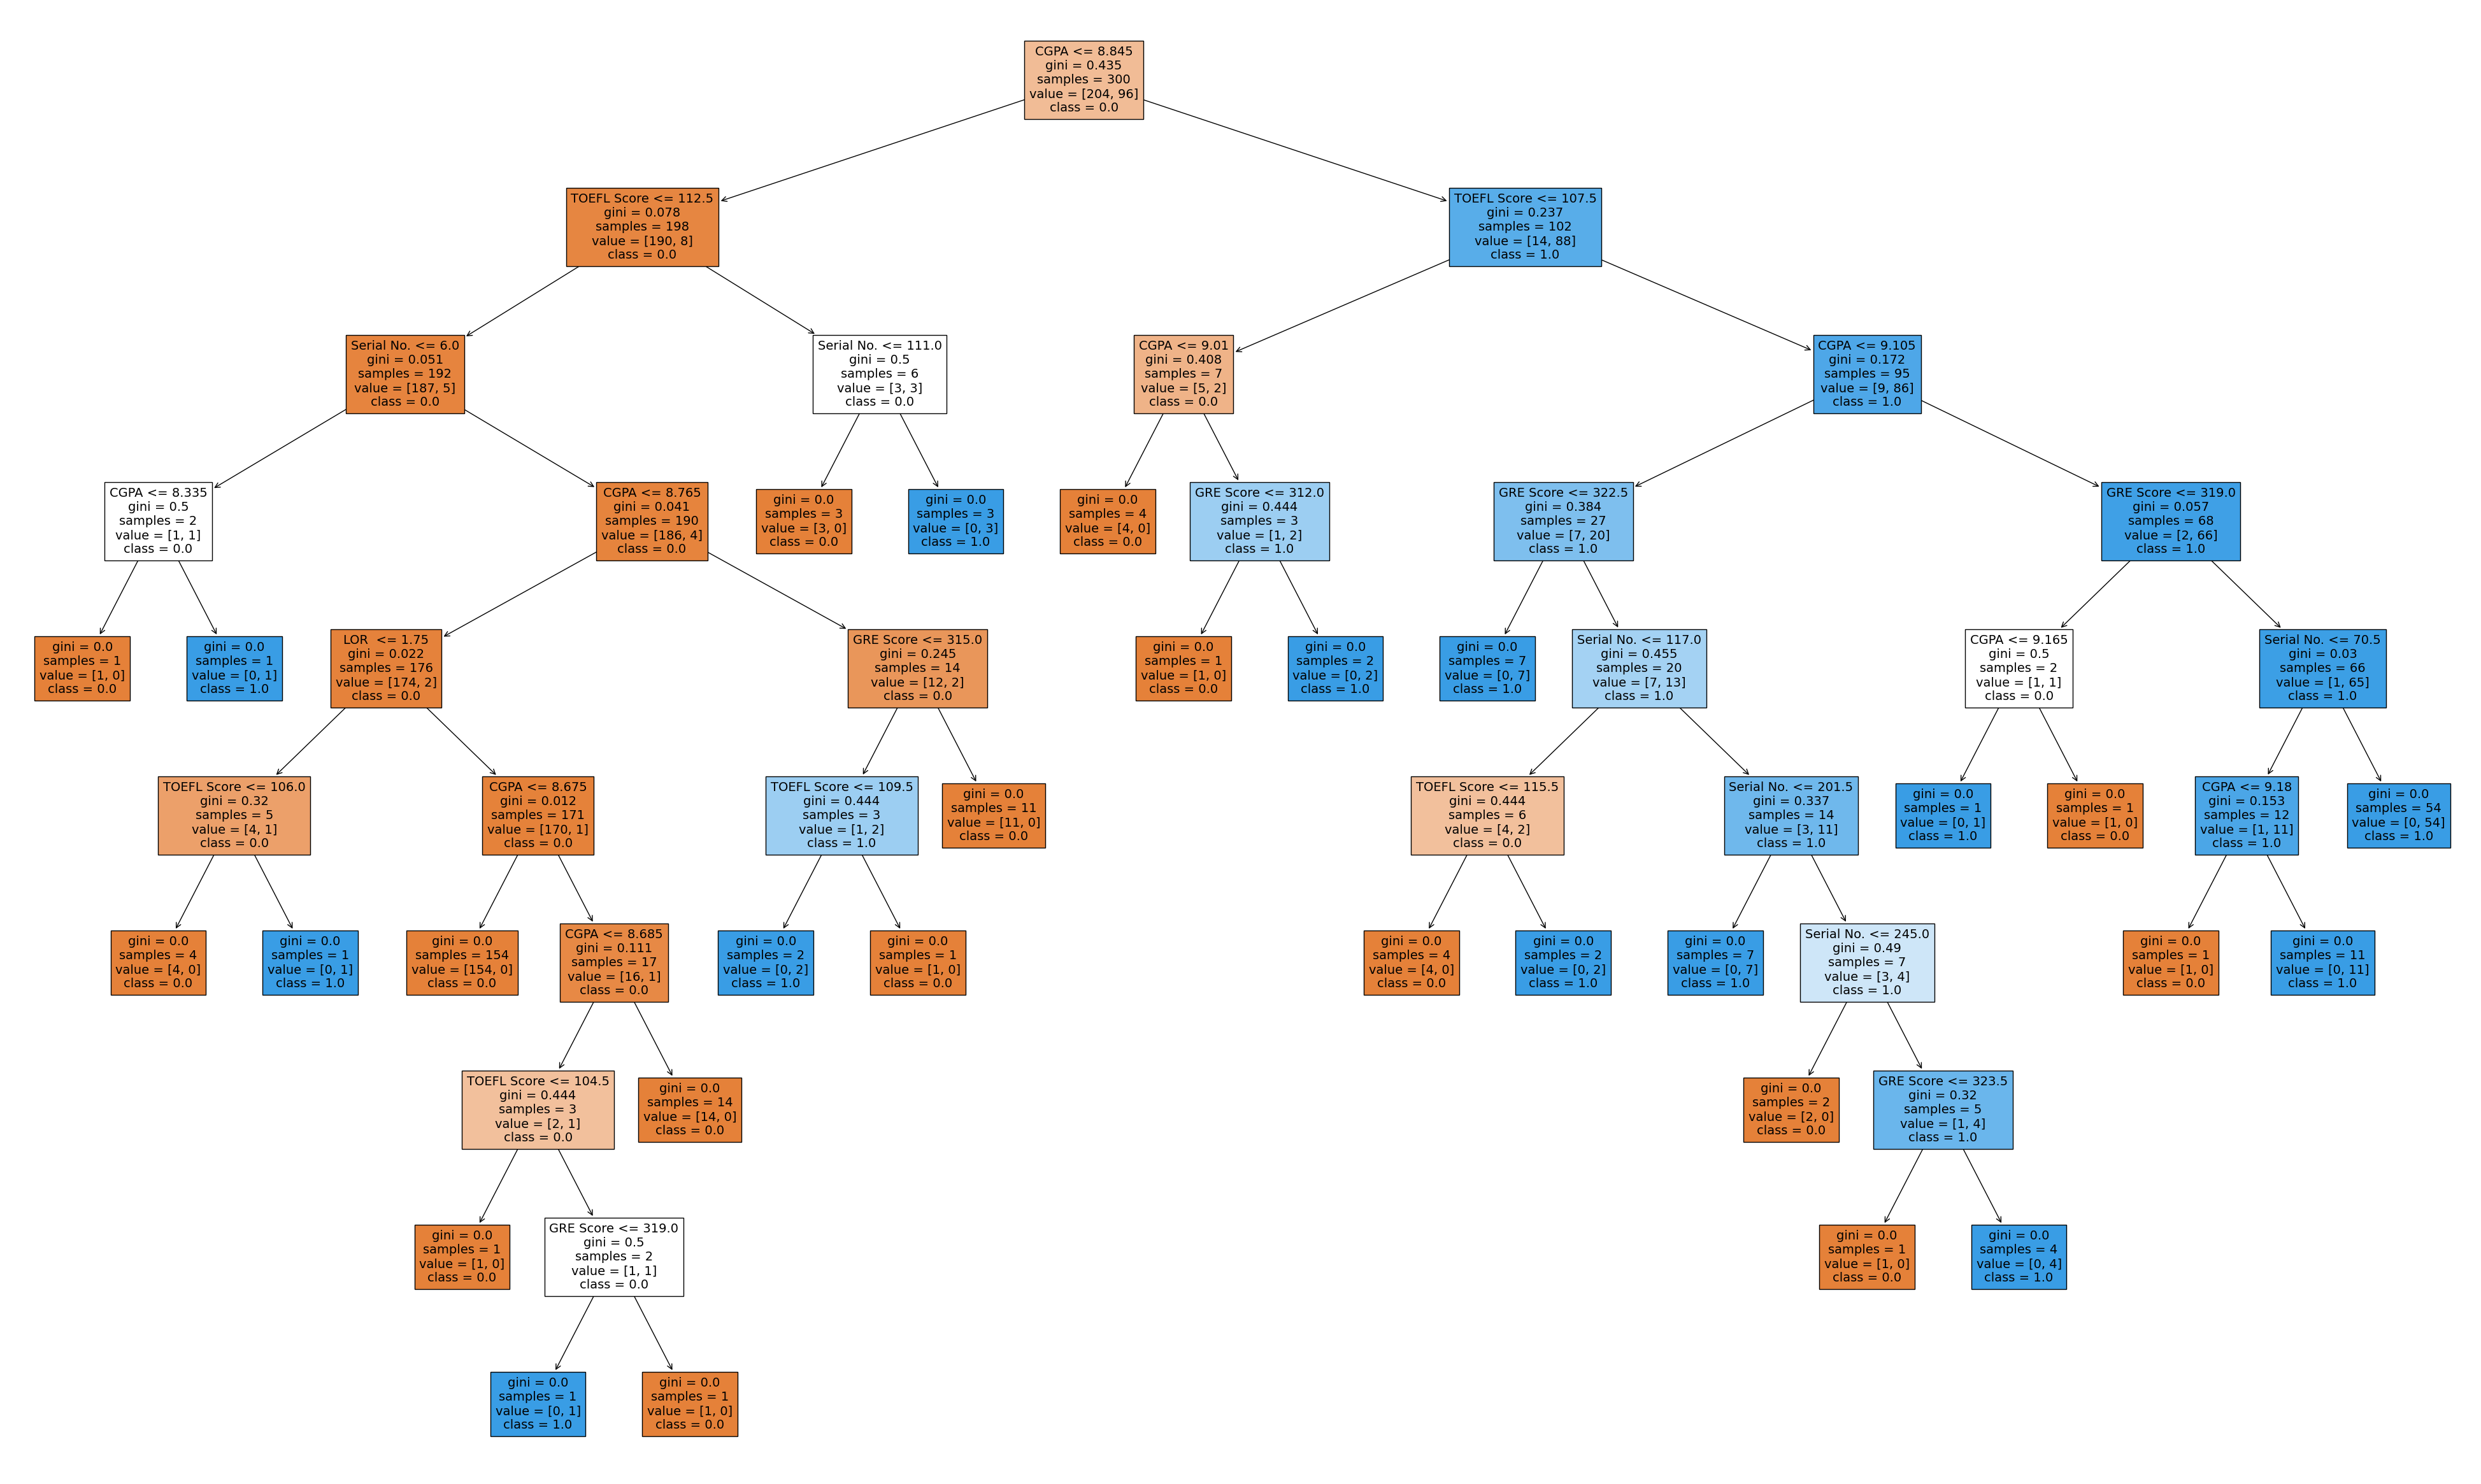

In [23]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(50,30))
tree.plot_tree(model,feature_names=figure_names,class_names=class_names,filled=True)